## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [255]:
diabetes = pd.read_csv("../data/diabetes.csv")

In [256]:
diabetes["Outcome"].value_counts() / len(diabetes)

Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64

In [257]:
diabetes.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [258]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [259]:
X = diabetes[diabetes.columns.drop("Outcome")]
y = diabetes["Outcome"]

In [260]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [261]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

0.2 ~ 0.3 정도가 적당하다. 테스트 데이터셋은 모델의 성능을 평가하는 데 사용되는데, 이 데이터셋의 크기가 충분히 커야 모델이 실제 데이터에 대해 일반화할 수 있습니다. 또한, 과적합을 방지하여 학습 데이터와 테스트 데이터 모두 안정적인 성능을 낼 수 있다. 

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

 데이터를 분할할 때, 타겟 변수의 각 클래스 비율을 유지하기 위해서이다. 이진 분류 문제에서는 타겟 변수의 클래스 불균형 문제가 발생할 수 있기 때문에 stratify 매개변수를 사용하여 훈련 데이터와 테스트 세트에서 각 클래스의 비율을 유지하도록 한다. 

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [263]:
def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba[:, 1])

    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

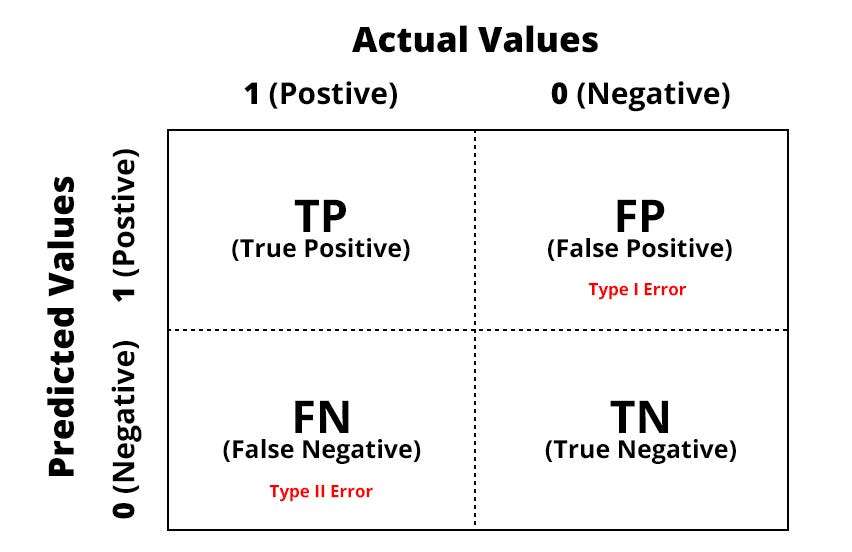

In [264]:
# pip install ipython

from IPython.display import Image
Image("confusion.jpg")

분류 모델의 성능 평가 지표로서, 학습을 통한 예측 성능을 측정하기 위해 예측값과 실제값을 비교하는 표. 
+ Accuracy = (TP + TN) / (TP + TN + FP + FN) 
+ Precision = TP / (TP + FP) 
+ Recall = TP / (TP + FN)  
+ F1-score = (2 * Precision * Recall) / (Precision + Recall) 

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [265]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', random_state = 123)
model.fit(X_train, y_train)

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8434


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘sag’, ‘saga’}, default=’lbfgs’ 
+ liblinear: 소규모 데이터셋에 적합한 최적화 알고리즘이다. 이 알고리즘은 L1 규제와 L2 규제를 지원하고, 선형적인 학습 시간을 가지고 있다. 

+ 'newton-cg': 소규모 데이터셋에서 사용되는 뉴턴-케스트로브(Newton-CG) 방법을 기반으로 L2 규제만 지원한다. 뉴턴-케스트로브 방법은 미분 가능한 목적 함수를 최적화하는데 사용되는 반복적인 방법으로, 수렴 속도가 빠르지만 큰 데이터셋에는 적합하지 않다. 

+ 'lbfgs': L2 규제를 사용하는 Broyden-Fletcher-Goldfarb-Shanno(BFGS) 최적화 알고리즘을 개선 버전이다. BFGS 알고리즘은 경사 하강법의 한 종류로, 손실 함수를 최소화하는데 사용됩니다. 수렴이 잘되고 빠른 속도로 최적화를 수행하지만, 큰 데이터셋에는 적합하지 않다. 

+ 'sag': 대규모 데이터셋에 적합한 확률적 평균 경사 하강(Stochastic Average Gradient descent, SAG) 알고리즘을 기반으로 합니다. 빠르게 수렴되고, 각 반복에서 전체 훈련 데이터셋의 일부 샘플만 사용하여 경사 하강을 수행하므로 메모리 효율성이 뛰어납니다. 

+ 'saga': sag 알고리즘의 개선 버전입니다. L1 규제와 L2 규제를 모두 지원하고, 일부 데이터셋에서 sag 알고리즘보다 더 빠른 수렴을 제공할 수 있습니다. 

-----------
+ L1 규제: L1 규제는 가중치(w)의 절댓값의 합을 손실 함수에 추가하여 사용한다. L1 규제를 사용하면 불필요한 feature들을 제거하고 모델의 해석력을 향상시켜서 feature selection에 유용하다.
+ L2 규제: L2 규제는 가중치(w)의 제곱의 합을 손실 함수에 추가하여 사용한다. L2 규제는 가중치 값을 균일하게 분산시킴으로써 일반화 성능을 높인다. 과적합을 방지하고 모델의 안정성을 높일 수 있습니다.

출처: https://knowallworld.tistory.com/446 [뭐든지 다 알아보자:티스토리]

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

+ pred(test) : 모델의 최종 예측값 출력. ex) 회귀 모델 : 0.3456... 특정 값을 출력 , 분류 모델 : 가장 확률이 높은 클래스를 출력

+ pred_proba(test) : 분류 모델이 각 클래스에 대해서 예측한 확률을 출력. 회귀에서는 사용되지 않는다. 

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [266]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #X축, y축 label과 legend, grid 설정
    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend()
    plt.grid()
    plt.show()

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

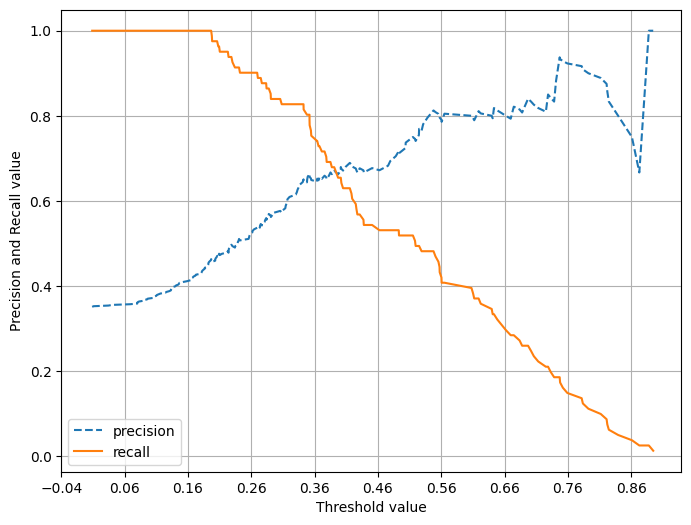

In [267]:
pred_proba_c1 = model.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [268]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [269]:
def zero_to_mean(dataframe, columns):
    mean = dataframe[columns].mean()
    
    for col in columns:
        dataframe[col] = dataframe[col].replace(0, mean[col])
    
    return dataframe

In [270]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체

columns_rep = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df = zero_to_mean(diabetes, columns_rep)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df[df.columns.drop("Outcome")]
y = df["Outcome"]

scaler.fit(X)
X_scaled = scaler.transform(X)

In [272]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

이유 : feature 간의 크기가 서로 다르면, 모델 학습 시 상대적으로 크기가 큰 feature에 영향을 많이 받으므로 feature의 크기를 똑같은 단위로 변경한다.  
+ StandardScaler : 각 feature들을 평균이 0이고, 분산이 1인 정규분포를 가진 값으로 변환
+ MinMaxScaler : 각 feature들을 0과 1 사이의 범위를 가진 값으로 변환 

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [273]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123, stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [274]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', random_state = 123)
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)
pred_proba = model.predict_proba(X_test_scaled)

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[130  20]
 [ 41  40]]
정확도: 0.7359, 정밀도: 0.6667, 재현율: 0.493827, F1: 0.5674, AUC:0.8505


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

In [219]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [303]:
X = df[df.columns.drop("Outcome")]
y = df["Outcome"]

In [348]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
X_scaled2 = scaler2.fit_transform(X)

In [360]:
X_train_scaled2, X_test_scaled2, y_train, y_test = train_test_split(X_scaled2, y, test_size=0.3, random_state=123, stratify=y)

In [388]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', random_state = 123)
model.fit(X_train_scaled2, y_train)

pred = model.predict(X_test_scaled2)
pred_proba = model.predict_proba(X_test_scaled2)

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[134  16]
 [ 44  37]]
정확도: 0.7403, 정밀도: 0.6981, 재현율: 0.456790, F1: 0.5522, AUC:0.8574


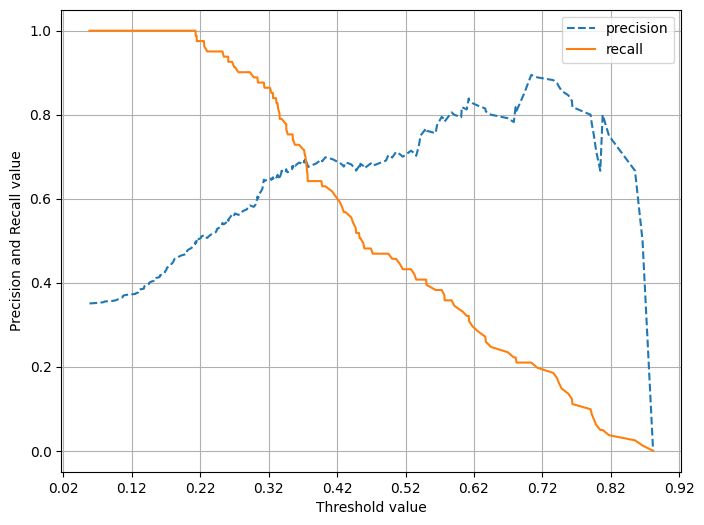

In [389]:
pred_proba_c1 = model.predict_proba(X_test_scaled2)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [392]:
# predict_proba 메서드로 예측 확률 얻기
pred_proba = model.predict_proba(X_test_scaled2)

# 양성 클래스(1)에 대한 예측 확률 추출
pos_prob = pred_proba[:, 1]

# 설정한 임계값을 기준으로 클래스 예측
threshold = 0.32
pred_threshold = (pos_prob >= threshold).astype(int)

# 모델의 성능을 평가합니다.
clf_eval(y_test, pred_threshold, pred_proba)


오차 행렬,
 [[112  38]
 [ 11  70]]
정확도: 0.7879, 정밀도: 0.6481, 재현율: 0.864198, F1: 0.7407, AUC:0.8574
